In [1]:
# Import standard machine learning / data science libraries
%matplotlib inline
from sklearn.utils import shuffle
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import GridSearchCV
#from sklearn.model_selection import train_test_split

# Import Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
# Load data and shuffle
trainSet = pd.read_csv("G:\GATech\Machine Learning Version 2\datatraining.txt")
trainSet = shuffle(trainSet).reset_index(drop=True)

In [3]:
# See what type of data we are dealing with
print(trainSet.info())
print()
print(trainSet.isnull().any())
print()
print(trainSet.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8143 entries, 0 to 8142
Data columns (total 7 columns):
date             8143 non-null object
Temperature      8143 non-null float64
Humidity         8143 non-null float64
Light            8143 non-null float64
CO2              8143 non-null float64
HumidityRatio    8143 non-null float64
Occupancy        8143 non-null int64
dtypes: float64(5), int64(1), object(1)
memory usage: 445.4+ KB
None

date             False
Temperature      False
Humidity         False
Light            False
CO2              False
HumidityRatio    False
Occupancy        False
dtype: bool

       Temperature     Humidity        Light          CO2  HumidityRatio  \
count  8143.000000  8143.000000  8143.000000  8143.000000    8143.000000   
mean     20.619084    25.731507   119.519375   606.546243       0.003863   
std       1.016916     5.531211   194.755805   314.320877       0.000852   
min      19.000000    16.745000     0.000000   412.750000       0.002674   


In [4]:
# Drop the "date" field as these are just time stamps
trainSet = trainSet.drop(['date'], axis = 1)

# This dataset includes two test sets.  Load them and drop the 'date' field as well
testSet = pd.read_csv("G:\GATech\Machine Learning Version 2\datatest.txt")
testSet2 = pd.read_csv("G:\GATech\Machine Learning Version 2\datatest2.txt")
testSet = testSet.drop(['date'], axis = 1)
testSet2 = testSet2.drop(['date'], axis = 1)

In [5]:
# Create test and train sets
# Separate into Train and Test sets
X_train = trainSet[['Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio']]
y_train = trainSet[['Occupancy']]

X_test = testSet[['Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio']]
y_test = testSet[['Occupancy']]

X_test2 = testSet2[['Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio']]
y_test2 = testSet2[['Occupancy']]

features = ['Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio']
target = ['Occupancy']

In [6]:
# Without tuning any hyperparameters or using cross validation, see how accurate the Decision Tree is on both test sets
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
print(dtc.score(X_train, y_train))
print(dtc.score(X_test, y_test))
print(dtc.score(X_test2, y_test2))
print(dtc)

1.0
0.9088180112570357
0.963084495488105
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


In [7]:
# ~90% accuracy.  Not too bad.  Let's tune the hyperparameters using the Grid Search feature
features = ['Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio']
parameters = {"criterion": ["gini", "entropy"],
              "min_samples_split": [2, 5, 10, 15, 20],
              "max_depth": [2, 3, 4, 5, 6, 7, 8, 9, 10],
              "min_samples_leaf": [1, 3, 5, 7, 9, 10],
              "max_leaf_nodes": [None, 5, 10, 15, 20],
              }
clf = GridSearchCV(tree.DecisionTreeClassifier(), parameters, n_jobs=4, cv = 4)
clf.fit(X=X_train, y=y_train)
print (clf.best_score_, clf.best_params_) 

0.993614147120226 {'criterion': 'entropy', 'max_depth': 6, 'max_leaf_nodes': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [8]:
from sklearn.metrics import accuracy_score
dtc = clf.best_estimator_
#dtc.fit(X_train, y_train)
print(dtc.score(X_train, y_train))
print(dtc.score(X_test, y_test))
print(dtc.score(X_test2, y_test2))

0.9972982930124032
0.8923076923076924
0.9327317473338802


In [9]:
# Much better -- we obtain 99% accuracy on the training set by tuning hyperparameters and using cross validation
# Now let's visualize this by generating cross validation curves
# Code for generating learning curves

# Learning curves modified code from https://www.dataquest.io/blog/learning-curves-machine-learning/
from sklearn.model_selection import learning_curve

def learning_curves(estimator, data, features, target, train_sizes, cv, testData):
    train_sizes, train_scores, validation_scores = learning_curve(
                                                 estimator, data[features], data[target], train_sizes = train_sizes,
                                                 cv = cv, scoring = 'accuracy', shuffle=True)
    
    test_scores = learning_curve(estimator, testData[features], testData[target], train_sizes = train_sizes,
                                                 cv = cv, scoring = 'accuracy')[2]
    
    test_scores_mean = test_scores.mean(axis=1)
    
    train_scores_mean = train_scores.mean(axis = 1)
    validation_scores_mean = validation_scores.mean(axis = 1)
    
    plt.plot(train_sizes, train_scores_mean, label = 'Training accuracy')
    plt.plot(train_sizes, validation_scores_mean, label = 'Validation accuracy')
    plt.plot(train_sizes, test_scores_mean, label = 'Test accuracy')

    plt.ylabel('Accuracy', fontsize = 14)
    plt.xlabel('Training set size', fontsize = 14)
    title = 'Learning curves for a ' + str(estimator).split('(')[0] + ' model'
    plt.title(title, fontsize = 18, y = 1.03)
    plt.legend()
    plt.ylim(0.95,1.05,0.1)
    plt.xlim(0, 2000, 100)

Text(0.5,1.03,'Decision Tree Classifier - Occupancy Detection')

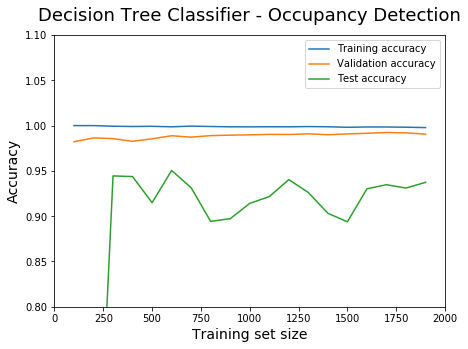

In [10]:
train_sizes = [100*x for x in range(1, 20)]
features = ['Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio']
target = ['Occupancy']

plt.figure(figsize=(7,5))
learning_curves(dtc, trainSet, features, target, train_sizes, 5, testSet)
plt.ylim(0.8,1.1,0.1)
plt.title("Decision Tree Classifier - Occupancy Detection", fontsize=18)

In [27]:
# Now let's tackle KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)  
knn.fit(X_train, y_train)  

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [28]:
knn.fit(X_train, y_train)
print(knn.score(X_test, y_test))
print(knn.score(X_test2, y_test2))

X_train = np.asarray(X_train)
y_train = np.asarray(y_train)
y_train = y_train.reshape(-1)
print(type(y_train), y_train.shape)

0.9425891181988743
0.9621616078753076
<class 'numpy.ndarray'> (8143,)


Text(0,0.5,'Cross-Validated Accuracy')

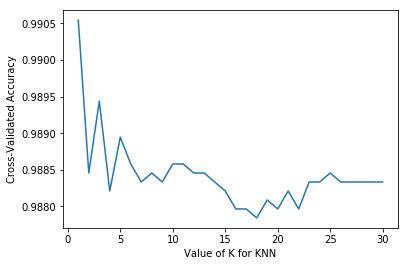

In [29]:
# ~95% accuracy from the start.  Let's tune the hyperparameter, k
k_range = [i for i in range(1, 31)]
k_scores = []
from sklearn.cross_validation import cross_val_score
for k in k_range:
    # 2. run KNeighborsClassifier with k neighbours
    knn = KNeighborsClassifier(n_neighbors=k)
    # 3. obtain cross_val_score for KNeighborsClassifier with k neighbours
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    # 4. append mean of scores for k neighbors to k_scores list
    k_scores.append(scores.mean())
    
# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

In [30]:
# Using GridSearch
# define the parameter values that should be searched
# for python 2, k_range = range(1, 31)
k_range = list(range(1, 31))
print(k_range)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]


In [31]:
# create a parameter grid: map the parameter names to the values that should be searched
# simply a python dictionary
# key: parameter name
# value: list of values that should be searched for that parameter
# single key-value pair for param_grid

weight_options = ["uniform", "distance"]
#metrics = ["minkowski", "euclidean"]
#param_grid = dict(metric = metrics,n_neighbors=k_range,weights = weight_options)
param_grid = dict(n_neighbors=k_range)
print(param_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]}


In [32]:
# instantiate the grid
grid = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')

In [33]:
# fit the grid with data
grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=30, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [34]:
# create a list of the mean scores only
# list comprehension to loop through grid.grid_scores
grid_mean_scores = [result.mean_validation_score for result in grid.grid_scores_]
print(grid_mean_scores)

[0.9888247574603954, 0.986614269925089, 0.98808792828196, 0.9874739039665971, 0.9883335380081051, 0.9882107331450325, 0.9879651234188874, 0.9875967088296697, 0.9878423185558148, 0.98808792828196, 0.9879651234188874, 0.9877195136927422, 0.98808792828196, 0.9877195136927422, 0.9878423185558148, 0.9878423185558148, 0.9879651234188874, 0.9875967088296697, 0.9878423185558148, 0.9877195136927422, 0.9879651234188874, 0.9879651234188874, 0.9883335380081051, 0.9882107331450325, 0.9883335380081051, 0.9883335380081051, 0.9883335380081051, 0.9883335380081051, 0.9883335380081051, 0.9883335380081051]


Text(0,0.5,'Cross-Validated Accuracy')

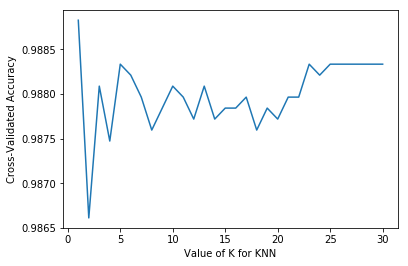

In [35]:
# plot the results
# this is identical to the one we generated above
plt.plot(k_range, grid_mean_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

In [36]:
# examine the best model

# Single best score achieved across all params (k)
print(grid.best_score_)

# Dictionary containing the parameters (k) used to generate that score
print(grid.best_params_)

# Actual model object fit with those best parameters
# Shows default parameters that we did not specify
print(grid.best_estimator_)
print(type(grid.best_estimator_))
knn = grid.best_estimator_
knn.fit(X_train, y_train)

0.9888247574603954
{'n_neighbors': 1}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')
<class 'sklearn.neighbors.classification.KNeighborsClassifier'>


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

(0.8, 1.1)

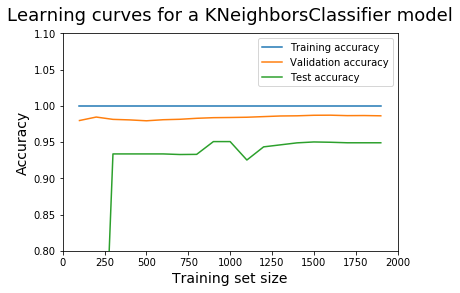

In [37]:
import warnings
warnings.filterwarnings('ignore')
learning_curves(knn, trainSet, features, target, train_sizes, 5, testSet2)
plt.ylim(0.8,1.1,0.1)

In [38]:
knn.score(X_test, y_test)

0.9365853658536586

In [39]:
knn.score(X_test2, y_test2)

0.9502666119770303

In [41]:
# Looking better.  Now let's try neural nets
from sklearn.neural_network import MLPClassifier

ann = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
ann.fit(X_train, y_train)
ann.score(X_test, y_test)

0.6352720450281426

In [42]:
# Not nearly as good.  Try turning parameters
parameters = {'solver': ['lbfgs'], 'max_iter': [1000,1100,1200,1300,1400,1500,1600,1700,1800,1900,2000],
              'alpha': 10.0 ** -np.arange(1, 3), 'hidden_layer_sizes':np.arange(3, 5),
              'random_state':[0,1,2]}
clf = GridSearchCV(MLPClassifier(), parameters, n_jobs=-1)

In [43]:
clf.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'solver': ['lbfgs'], 'max_iter': [1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000], 'alpha': array([0.1 , 0.01]), 'hidden_layer_sizes': array([3, 4]), 'random_state': [0, 1, 2]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [50]:
ann = clf.best_estimator_

In [51]:
ann.score(X_train, y_train)

0.9883335380081051

In [52]:
ann.score(X_test, y_test)

0.9782363977485928

(0.5, 1.05)

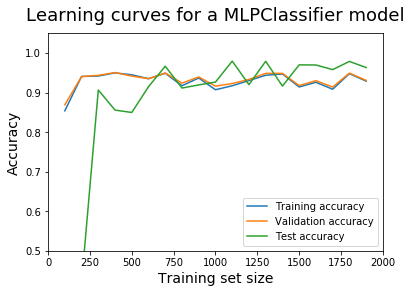

In [53]:
#ann = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
learning_curves(ann, trainSet, features, target, train_sizes, 5, testSet)
plt.ylim(0.50,1.05,0.1)

Text(0.5,1.03,'MLP Classifier - Occupancy Detection')

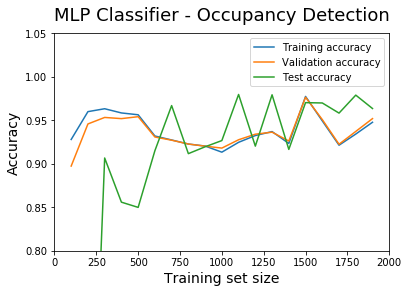

In [58]:
learning_curves(ann, trainSet, features, target, train_sizes, 5, testSet)
plt.ylim(.8,1.05,.1)
plt.title("MLP Classifier - Occupancy Detection", fontsize = 18)

In [55]:
ann.score(X_test, y_test)

0.9782363977485928

In [56]:
ann.score(X_test2, y_test2)

0.9923092698933552

In [59]:
# Near 100% accuracy.  Our Neural Net is great!
# Now let's try Support Vector Machines
from sklearn.svm import SVC
clf = SVC(gamma='auto')
clf.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [60]:
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))
print(clf.score(X_test2, y_test2))

0.9997543902738548
0.9103189493433396
0.5794708777686628


In [61]:
Cs = [0.001, 0.01, 0.1, 1, 10]
gammas = [0.001, 0.01, 0.1, 1]
kernels = ["linear", "rbf"]
parameters = {'C': Cs, 'gamma' : gammas, 'kernel' : kernels}
clf = GridSearchCV(SVC(), parameters, n_jobs=-1)

In [62]:
clf.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10], 'gamma': [0.001, 0.01, 0.1, 1], 'kernel': ['linear', 'rbf']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [68]:
clf.score(X_train, y_train)

0.9911580498587744

In [69]:
svc = clf.best_estimator_
print(svc)
print(svc.score(X_test, y_test))

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
0.9474671669793621


Text(0.5,1.03,'SVM Classifier - Occupancy Detection')

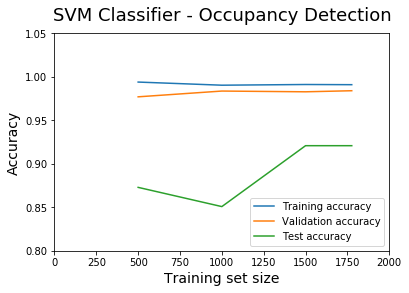

In [67]:
train_sizes = [500, 1000, 1500, 1776]
learning_curves(svc, trainSet, features, target, train_sizes, 5, testSet)
plt.ylim(.8,1.05,.1)
plt.title("SVM Classifier - Occupancy Detection", fontsize=18)

In [95]:
# Now Adaboost on Decision Tree
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(n_estimators=100, random_state=42, base_estimator = dtc)
abc.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1.0, n_estimators=100, random_state=42)

In [93]:
abc.score(X_train, y_train)

1.0

In [94]:
abc.score(X_test, y_test)

0.9369606003752345

In [87]:
abc.score(X_test2, y_test2)

0.9247333880229697

Text(0.5,1.03,'AdaBoost Classifier - Occupancy Detection')

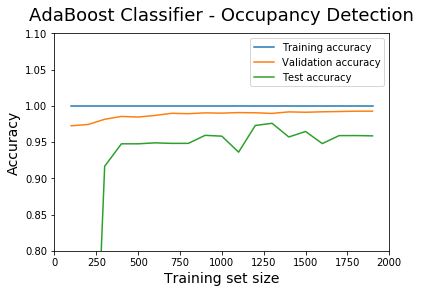

In [88]:
train_sizes = [100*x for x in range(1, 20)]
learning_curves(abc, trainSet, features, target, train_sizes, 5, testSet2)
plt.ylim(0.8,1.1,0.1)
plt.title("AdaBoost Classifier - Occupancy Detection", fontsize=18)

In [101]:
# Accuracies for training and testing
for classifier in [dtc, knn, ann, svc, abc]:
    print (classifier.score(X_train, y_train), classifier.score(X_test, y_test))

0.9972982930124032 0.8923076923076924
1.0 0.9365853658536586
0.9883335380081051 0.9782363977485928
0.9911580498587744 0.9474671669793621
1.0 0.9410881801125703


In [110]:
# Confusion Matrix for Occupancy Detection

import itertools
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()  

Confusion matrix, without normalization
[[1666   27]
 [ 282  690]]


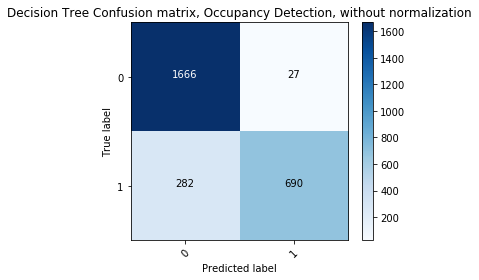

In [113]:
y_pred = dtc.fit(X_train, y_train).predict(X_test)

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
class_names = [0, 1]
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Decision Tree Confusion matrix, Occupancy Detection, without normalization')

Confusion matrix, without normalization
[[1646   47]
 [ 122  850]]


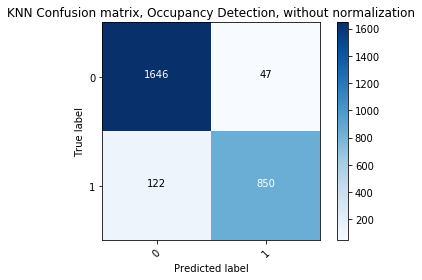

In [115]:
y_pred = knn.fit(X_train, y_train).predict(X_test)

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
class_names = [0, 1]
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='KNN Confusion matrix, Occupancy Detection, without normalization')

Confusion matrix, without normalization
[[1638   55]
 [   3  969]]


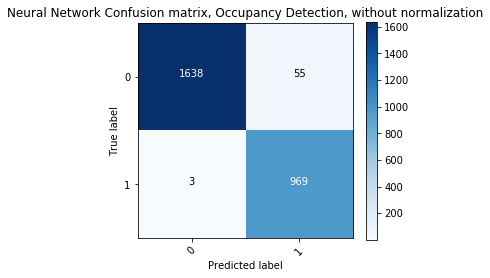

In [116]:
y_pred = ann.fit(X_train, y_train).predict(X_test)

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
class_names = [0, 1]
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Neural Network Confusion matrix, Occupancy Detection, without normalization')

Confusion matrix, without normalization
[[1618   75]
 [  65  907]]


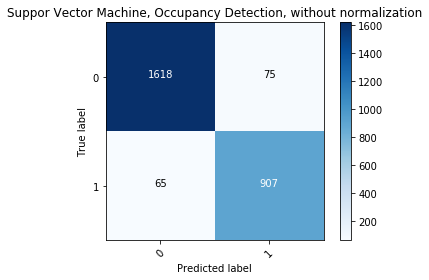

In [117]:
y_pred = svc.fit(X_train, y_train).predict(X_test)

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
class_names = [0, 1]
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Suppor Vector Machine, Occupancy Detection, without normalization')

Confusion matrix, without normalization
[[1640   53]
 [ 104  868]]


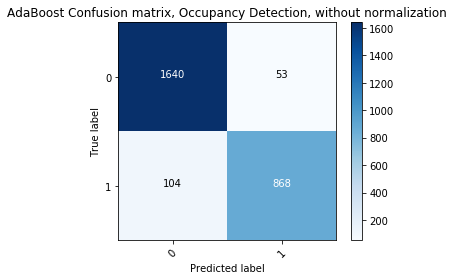

In [118]:
y_pred = abc.fit(X_train, y_train).predict(X_test)

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
class_names = [0, 1]
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='AdaBoost Confusion matrix, Occupancy Detection, without normalization')

In [125]:
# Wall clock times for training and prediction
import time
trainTimes = []
predictTimes = []
for classifier in [dtc, knn, ann, svc, abc]:
    start = time.time()
    classifier.fit(X_train, y_train)
    end = time.time()
    trainTimes.append(end - start)
    
    start = time.time()
    classifier.predict(X_test)
    end = time.time()
    predictTimes.append(end - start)

In [126]:
print(trainTimes)
print(predictTimes)

[0.008991003036499023, 0.013985633850097656, 0.16883063316345215, 0.35465025901794434, 1.3086462020874023]
[0.0009987354278564453, 0.008990764617919922, 0.0, 0.03396964073181152, 0.03296685218811035]
